In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)

In [6]:
y=df['sales']

In [9]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
poly_features=polynomial_converter.fit_transform(X)

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.shape

(200, 3)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)


In [16]:
from sklearn.linear_model import LinearRegression


In [18]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [19]:
test_predictions=model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error (y_test,test_predictions)
MSE=mean_squared_error (y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [22]:
MAE

0.48967980448037

In [23]:
MSE

0.4417505510403648

In [24]:
RMSE

0.6646431757269196

In [28]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range (1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_RMSE=np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE=np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    

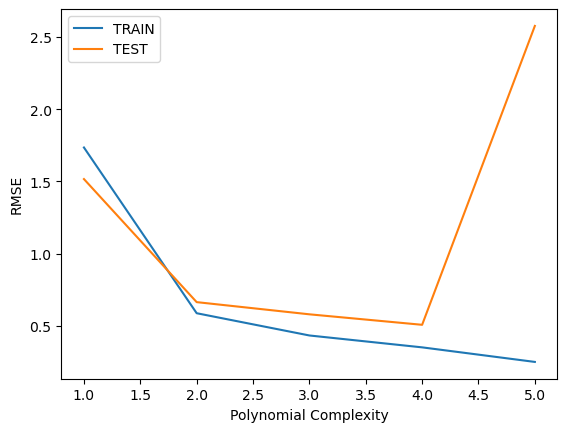

In [29]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN")
plt.plot(range(1,6),test_rmse_errors[:5],label="TEST")
plt.xlabel("Polynomial Complexity")
plt.ylabel('RMSE')
plt.legend()

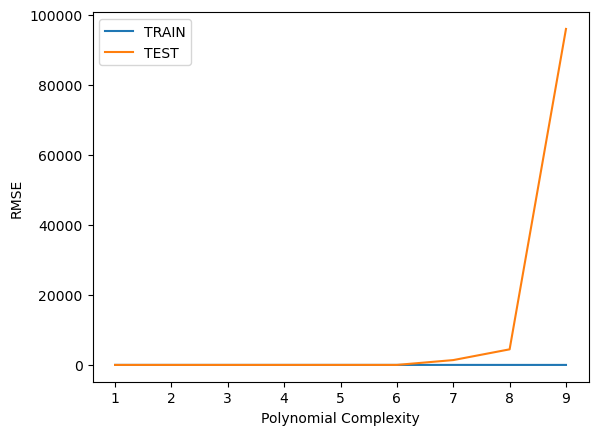

In [31]:
plt.plot(range(1,10),train_rmse_errors,label="TRAIN")
plt.plot(range(1,10),test_rmse_errors,label="TEST")
plt.xlabel("Polynomial Complexity")
plt.ylabel('RMSE')
plt.legend()

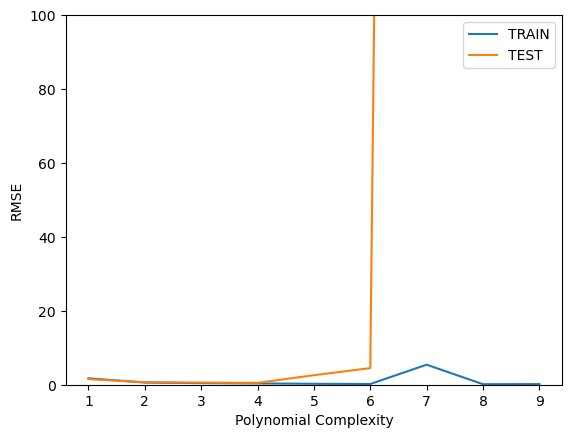

In [32]:
plt.plot(range(1,10),train_rmse_errors,label="TRAIN")
plt.plot(range(1,10),test_rmse_errors,label="TEST")
plt.xlabel("Polynomial Complexity")
plt.ylabel('RMSE')
plt.ylim(0,100)
plt.legend()